# Mathco. thon : Car Price Prediction Powered By Machine Hack

![Alt txt](https://machinehack.com/static/media/math-company-banner.1b9544dc.jpg)


### Overview Of Competition

* TheMathCompany is a modern, hybrid consulting firm that builds Custom AI Applications for Fortune 500 & equivalent companies. Our well-rounded consulting model addresses pressing gaps that exist in conventional analytics service provider models and off-the-shelf products. We offer the collective advantages of customization, diverse problem-solving capabilities, speed of delivery, reusability and scalability – all powered by our proprietary AI master engine, Co.dx.
* TheMathCompany, enable data analytics transformations for Fortune 500 organizations across the world. They enable clients to build core capabilities that set them on a path to achieve analytics self-sufficiency. Over the last four years, they have been consistently doubling in size year-on-year with 600+(and counting...) Data Scientists & Engineers, Consultants and Visualization experts. An exciting opportunity to be a part of the growth journey of one of the fastest growing AI & ML firms – scope for experimentation, the big & small victories, the learning and everything in between.


### About Data

* With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we are bringing a car price prediction challenge for all. We all aspire to own a car within budget with the best features available. To solve the price problem we have created a dataset of 19237 for the training dataset and 8245 for the test dataset.


### Attributes
|Features|Description|
|--------|-----------|
|ID      |Unique Identification no.|
|Price   |Price Of Car             |
|Levy    |The tax levied on a vehicle is based on the class of motor vehicle|
|Manufacturer|Car Manufacturer|
|Model       | Car Model |
|Prod. year  | Year the car was Manufactured |
|Category    | Wheather the car is sedan,Hatchback or Jeep|
|Leather interior|Wheather the car has leather interior or not|
|Fuel type | Fuelt type of Car |
|Engine volume| Specifies the Volume of Car Engine |
|Mileage      | Distance Covered by car |
|Cylinders    | Specifies the number of Cylinders Car engine has|
|Gear box type| The type of Gear Transmission Car has Manual,Transmission|
|Drive wheels | 4X4,Front,Rear |
|Doors        |2 doors or 4 doors|
|Wheel        |Right hand drive or Left Hand Drive |
|Color        |Color Of Car|
|Airbags      |Number of Airbags Car has|


### Leaderboard Rank:

* Public Leaderboard : 130 / 676
* Private Leaderboard : 71 / 676

### Leadboard Score RMSLE :

* Public Leaderboard : 0.88201
* Private Leaderboard Score : 0.85624

## Importing Required Libraries

In [1]:
#Importing Required Number of Libraries
#Importing Required Libraries
#_______________________________________________________________________________________________________________
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
#_______________________________________________________________________________________________________________
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder

### Load Dataset

In [2]:
path="./train.csv"
train=pd.read_csv(path)
train

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.00,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.00,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.00,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.00,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.00,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.00,Automatic,Front,04-May,Left wheel,Black,4


In [3]:
path="./test.csv"
test=pd.read_csv(path)
test

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,nan
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,nan
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,nan
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,nan
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000 km,4,Manual,Front,04-May,Left wheel,Blue,6,nan
8241,45682346,-,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000 km,4,Tiptronic,Front,04-May,Left wheel,Black,6,nan
8242,45649860,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907 km,8,Automatic,4x4,04-May,Left wheel,Black,0,nan
8243,45809706,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000 km,4,Automatic,Front,04-May,Left wheel,Green,4,nan


### Drop Duplicates

In [4]:
train.drop_duplicates(inplace=True)

### Data Preprocessing

In [5]:
train['Levy']=train['Levy'].replace('-','0')
train['Levy']=train['Levy'].astype(int)
train['Prod. year']=train['Prod. year'].astype(str)
train['Levy']=train['Levy'].replace('-','0')
test['Levy']=test['Levy'].replace('-','0')
train['Levy']=train['Levy'].astype(int)

train[['Mileage','Engine volume']] = train[['Mileage','Engine volume']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)
test[['Mileage','Engine volume']] = test[['Mileage','Engine volume']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)

dict={'04-May':4,'02-Mar':4,'>5':5}
train['Doors']=train['Doors'].map(dict)
test['Doors']=test['Doors'].map(dict)

train['Engine volume']=train['Engine volume'].astype(float)
test['Engine volume']=test['Engine volume'].astype(float)


train['Mileage']=train['Mileage'].astype(float)
test['Mileage']=test['Mileage'].astype(float)

#train['Safety_Rating']=np.where(train['Airbags']<4,1,2)
#test['Safety_Rating']=np.where(test['Airbags']<4,1,2)



le=LabelEncoder()
features=['Category','Leather interior','Fuel type','Gear box type','Drive wheels','Wheel','Color']
for i in features:
    train[i]=le.fit_transform(train[i])
    test[i]=le.transform(test[i])
    
train['Prod. year']=train['Prod. year'].astype(int)

### Correlation Check

<AxesSubplot:>

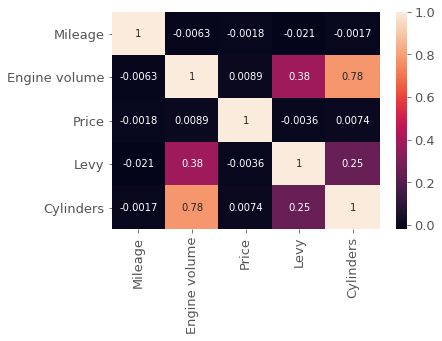

In [6]:
#Correlation Check
cont_col=train[['Mileage','Engine volume','Price','Levy','Cylinders']]
A=cont_col.corr()
sns.heatmap(A,annot=True)

### Feature Engineering

In [7]:
train['Avg_Enginevol_cylinders']=(train['Engine volume']+train['Cylinders'])/2
test['Avg_Enginevol_cylinders']=(test['Engine volume']+test['Cylinders'])/2

In [8]:
train['Age of Car']=2021-train['Prod. year']
test['Age of Car']=2021-test['Prod. year']



#Adaptive binning on 'Age' using quantiles
quantile_list = [0, .25, .5, .75, 1.]
quantiles = train['Mileage'].quantile(quantile_list)
quantile_labels = ['low','Medium', 'High', 'Highest']
train['Mileage_Group'] = pd.qcut(train['Mileage'], q=quantile_list, labels=quantile_labels)

quantile_list = [0, .25, .5, .75, 1.]
quantiles = test['Mileage'].quantile(quantile_list)
quantile_labels = ['low','Medium', 'High', 'Highest']
test['Mileage_Group'] = pd.qcut(test['Mileage'], q=quantile_list, labels=quantile_labels)


dict={'low':0,'Medium':1,'High':2,'Highest':3}
train['Mileage_Group']=train['Mileage_Group'].map(dict)
test['Mileage_Group']=test['Mileage_Group'].map(dict)

### Renaming Columns

In [9]:
train.columns=['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year',
       'Category', 'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Age_of_Car', 'Mileage_Group','Avg_Enginevol_cylinders']
test.columns=['ID', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price', 'Age_of_Car', 'Mileage_Group','Avg_Enginevol_cylinders']

## Frequency Encoding

In [10]:
def frequency_encoding(column, df, df_test=None):
    frequencies = df[column].value_counts().reset_index()
    df_values = df[[column]].merge(frequencies, how='left', 
                                   left_on=column, right_on='index').iloc[:,-1].values
    if df_test is not None:
        df_test_values = df_test[[column]].merge(frequencies, how='left', 
                                                 left_on=column, right_on='index').fillna(1).iloc[:,-1].values
    else:
        df_test_values = None
    return df_values, df_test_values
X=train[['Manufacturer','Model']]
Xt=test[['Manufacturer','Model']]
for column in X.columns:
    train_values, test_values = frequency_encoding(column, X, Xt)
    X[column+'_counts'] = train_values
    Xt[column+'_counts'] = test_values

In [11]:
train_data=pd.concat([train,X['Manufacturer_counts'],X['Model_counts']],1)
test_data=pd.concat([test,Xt['Manufacturer_counts'],Xt['Model_counts']],1)
train_data.drop(['Manufacturer','Model'],1,inplace=True)
test_data.drop(['Manufacturer','Model'],1,inplace=True)

## Modelling

In [12]:
# Applying Baseline models
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_log_error
X=train_data.drop(['Price'],1)
y=train_data['Price']
#X.fillna(0)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9)




#et=ExtraTreesRegressor(random_state=9,n_estimators=800)
rf=RandomForestRegressor(random_state=9,n_estimators=800)
#lgb=LGBMRegressor(random_state=9)
#xgb=XGBRegressor(random_state=9)
#cat=CatBoostRegressor(random_state=9)

models=[rf]
for model in (models):
    model.fit(X_train,np.log1p(y_train))
    y_pred=np.expm1(model.predict(X_test))
    rmse=np.sqrt(mean_squared_log_error(y_test,y_pred))
    score=cross_val_score(model,X_train,np.log(y_train),cv=5,scoring='neg_root_mean_squared_error')
    print('rmse:',rmse)
    print('scores:',score.mean(),score.std())
    print('----------------')

RandomForestRegressor(n_estimators=800, random_state=9)

rmse: 0.8567263483321145
scores: -0.9382932340975163 0.04599101544187589
----------------


### Prediction On Test Data

In [13]:
test_data.drop('Price',1,inplace=True)

In [14]:
preds=model.predict(test_data)
preds=np.exp(preds)
preds=pd.DataFrame(preds,columns=['Price'])
preds

,Price
0,10357.13
1,6976.33
2,7127.77
3,6138.03
4,2989.71
...,...
8240,7789.88
8241,24619.98
8242,327.92
8243,46639.80


In [567]:
preds.to_csv('./rf-all-fetures.csv',index=False)

In [130]:
train.to_csv('correct_train.csv',index=False)

In [131]:
test.to_csv('correct_test.csv',index=False)